In [5]:
from google.colab import files

uploaded = files.upload()

Saving sp_500_stocks.xlsx to sp_500_stocks.xlsx


Abstract 

I am trying to find if there are ways to get better returns than the SP 500 using the SP 500 stocks over a time period from 2009 to 2019. Better returns means making more money over the time period. I am not accounting for volatility factors or economic factors that may make some strategies work better or worse. I am using a few different methods that I found online. The first is a simple moving average strategy. This strategy says that for example when the 50 day moving average ( the average of the last 50 days of prices) is higher than the 200 day moving average that I should buy the stock or short the stock and hope that it goes down. I could sell the stock when it hits a certain price target such as 1% or I could sell after a certain time period such as 1 week or I could sell when the 50 day moving average crosses the 200 day moving average again. There are lots of common simple moving averages such as 5 day, 10 day, 20 day, 30 day, 50 day, 100 day, and 200 day averages. The second strategy that I implemented was a momentum strategy. Momentum is how much of a favorable characteristic does a company have if I look back a certain time period. I decided to track the momentum of the last 6 months of stock price gains. The companies that have the most gains in the last 6 months in their stock price I would buy the top 10% of those companies. Then I would sell at the end of 30 days and buy the stocks that have the most stock price gain. I could switch out the time period for the momentum, the hold period, adding in short selling, and looking at different definitions of momentum. My last method that I implemented was a supervised learning method using random forests. I would use a random forest to predict whether stocks would go up a certain percentage in a certain time period. Then using machine learning I could try different time periods and different percentages to see which ones the random forest can classify most accurately. 

The results of my simple moving average implementation were not very good. I did not find a method that got better returns than the SP 500 in the time period. I believe that there are some moving average methods that would beat the SP 500 reliably, but I was not able to run the calculations as it was too big for the computer that I have. I know that there are swing traders who trade stocks over certain small time periods such as 2 days to 1 week and make very good returns much higher than the SP 500 using similar methods. It would be interesting to look further into the percentages of having a certain stock move one way given a certain moving average cross over. 

The results of my second strategy using momentum worked very well. I was able to find a method that got much better results than the SP 500. The SP 500 returned around 12% over this time period but my momentum strategy returned 35%. I believe that there might be an even better momentum strategy if I combined certain momentum indicators with other indicators to filter out stocks that might not have good returns. I would say that momentum seems to be a good strategy just because it makes a lot of sense that the best returning stocks will continue to have good returns.

The final strategy that I tried was using a random forest model to classify stocks returns over a 1 month time period. I did not get very good results using this method. I was only able to get returns a little bit worse than the SP 500. I of course did not have a lot of chances at finding the right parameters since that would take a lot of computing power that I do not have. I believe that there would be a way that could get superior results than the SP 500 if I changed the time period, random forest parameters,return percentages, and adding in more features for the model to train on such as historical financial momentum and historical returns.


In [0]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier

In [0]:
Stockprices = pd.DataFrame()
counter = 0
#for loop through all the stock tickers
for i in stocklist['Ticker']:
  stockprice = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/'+str(i)+'?serietype=line')
  print('i')  
  data = json.loads(stockprice.text)
  try:
 	  pddata = json_normalize(data['historical'])
  except:
 	  continue
  pddata['symbol'+i] = data['symbol']
  Stockprices = pd.concat([Stockprices,pddata],axis=1)
  counter += 1
  print(counter,i)
Stockprices

In [0]:
#get the last ten years from each stock only greater than '2009-10-10' 
Stockprices10years = pd.DataFrame()
#for loop to loop through all the columns in setes of 3
for i in range(0,len(Stockprices.columns),3):
  #get the date column and the closing price column
  temp = pd.DataFrame(pd.concat([Stockprices.iloc[:,i],Stockprices.iloc[:,i+1]],axis=1))
  #only get prices for after 2009
  temp = temp[temp['date'] >'2009-10-10']
  #get the ticker name
  ticker = Stockprices.columns[i+2][6:]
  ticker = '_'.join(ticker.split('.'))
  #sanitize the ticker name
  print(ticker)
  #change the column names
  temp.columns = ['date'+ticker,'close'+ticker]
  temp.reset_index(inplace=True)
  #add the new to the main dataframe
  Stockprices10years = pd.concat([Stockprices10years,temp],axis=1)
Stockprices10years

In [0]:
Stockprices10years.to_csv('localstorage.csv')

In [119]:
financialRatios = pd.DataFrame()
counter = 0
 #for loop through all the stock tickers
for i in stocklist['Ticker']:
  financialRatio = requests.get('https://financialmodelingprep.com/api/v3/financial-ratios/'+str(i))
  data = json.loads(financialRatio.text)
  try:
 	  pddata = json_normalize(data['ratios'])
  except:
 	  continue
  pddata['symbol'] = data['symbol']
  financialRatios = pd.concat([financialRatios,pddata],axis=1)
financialRatios

,date,investmentValuationRatios.priceBookValueRatio,investmentValuationRatios.priceToBookRatio,investmentValuationRatios.priceToSalesRatio,investmentValuationRatios.priceEarningsRatio,investmentValuationRatios.receivablesTurnover,investmentValuationRatios.priceToFreeCashFlowsRatio,investmentValuationRatios.priceToOperatingCashFlowsRatio,investmentValuationRatios.priceCashFlowRatio,investmentValuationRatios.priceEarningsToGrowthRatio,investmentValuationRatios.priceSalesRatio,investmentValuationRatios.dividendYield,investmentValuationRatios.enterpriseValueMultiple,investmentValuationRatios.priceFairValue,profitabilityIndicatorRatios.niperEBT,profitabilityIndicatorRatios.ebtperEBIT,profitabilityIndicatorRatios.ebitperRevenue,profitabilityIndicatorRatios.grossProfitMargin,profitabilityIndicatorRatios.operatingProfitMargin,profitabilityIndicatorRatios.pretaxProfitMargin,profitabilityIndicatorRatios.netProfitMargin,profitabilityIndicatorRatios.effectiveTaxRate,profitabilityIndicatorRatios.returnOnAssets,profitabilityIndicatorRatios.returnOnEquity,profitabilityIndicatorRatios.returnOnCapitalEmployed,profitabilityIndicatorRatios.nIperEBT,profitabilityIndicatorRatios.eBTperEBIT,profitabilityIndicatorRatios.eBITperRevenue,operatingPerformanceRatios.receivablesTurnover,operatingPerformanceRatios.payablesTurnover,operatingPerformanceRatios.inventoryTurnover,operatingPerformanceRatios.fixedAssetTurnover,operatingPerformanceRatios.assetTurnover,liquidityMeasurementRatios.currentRatio,liquidityMeasurementRatios.quickRatio,liquidityMeasurementRatios.cashRatio,liquidityMeasurementRatios.daysOfSalesOutstanding,liquidityMeasurementRatios.daysOfInventoryOutstanding,liquidityMeasurementRatios.operatingCycle,liquidityMeasurementRatios.daysOfPayablesOutstanding,...,profitabilityIndicatorRatios.effectiveTaxRate,profitabilityIndicatorRatios.returnOnAssets,profitabilityIndicatorRatios.returnOnEquity,profitabilityIndicatorRatios.returnOnCapitalEmployed,profitabilityIndicatorRatios.nIperEBT,profitabilityIndicatorRatios.eBTperEBIT,profitabilityIndicatorRatios.eBITperRevenue,operatingPerformanceRatios.receivablesTurnover,operatingPerformanceRatios.payablesTurnover,operatingPerformanceRatios.inventoryTurnover,operatingPerformanceRatios.fixedAssetTurnover,operatingPerformanceRatios.assetTurnover,liquidityMeasurementRatios.currentRatio,liquidityMeasurementRatios.quickRatio,liquidityMeasurementRatios.cashRatio,liquidityMeasurementRatios.daysOfSalesOutstanding,liquidityMeasurementRatios.daysOfInventoryOutstanding,liquidityMeasurementRatios.operatingCycle,liquidityMeasurementRatios.daysOfPayablesOutstanding,liquidityMeasurementRatios.cashConversionCycle,debtRatios.debtRatio,debtRatios.debtEquityRatio,debtRatios.longtermDebtToCapitalization,debtRatios.totalDebtToCapitalization,debtRatios.interestCoverage,debtRatios.cashFlowToDebtRatio,debtRatios.companyEquityMultiplier,cashFlowIndicatorRatios.operatingCashFlowPerShare,cashFlowIndicatorRatios.freeCashFlowPerShare,cashFlowIndicatorRatios.cashPerShare,cashFlowIndicatorRatios.payoutRatio,cashFlowIndicatorRatios.receivablesTurnover,cashFlowIndicatorRatios.operatingCashFlowSalesRatio,cashFlowIndicatorRatios.freeCashFlowOperatingCashFlowRatio,cashFlowIndicatorRatios.cashFlowCoverageRatios,cashFlowIndicatorRatios.shortTermCoverageRatios,cashFlowIndicatorRatios.capitalExpenditureCoverageRatios,cashFlowIndicatorRatios.dividendpaidAndCapexCoverageRatios,cashFlowIndicatorRatios.dividendPayoutRatio,symbol
0,2018-10-31,4.5113,18.6793,4.2029,66.1122,6.552,22.8294,19.0001,19.046876080957,65.518842721519,4.2132589133089,0.009225290842146,20.105568074736,4.533381716663,0.33403805496829,0.92654260528893,0.20777370777371,0.54680504680505,1,0.18884818884819,0.064306064306064,0.66596194503171,0.0903,0.0692,0.1133,0.33403805496829,0.92654260528893,0.20777370777371,6.552,4.0124,8.1022,5.978102189781,0.57534246575342,3.286,2.5815542271563,1.9188727583262,-104.5667,57.6394,,25.2544,...,0.15702479338843,0.2954,0.6535,0.1507,0.8429752066115

In [0]:
financialRatios

In [93]:
companyProfile = pd.DataFrame()
counter = 0
 #for loop through all the stock tickers
for i in stocklist['Ticker']:
  companyProfiles = requests.get('https://financialmodelingprep.com/api/v3/company/profile/'+str(i))
  data = json.loads(companyProfiles.text)
  try:
    pddata = json_normalize(data['profile'])
  except:
    continue
  pddata['symbol'] = data['symbol']
  companyProfile = pd.concat([companyProfile,pddata],axis=0)
  counter += 1
  print(i)
 #companyProfile.to_csv(r'''C:\Users\Michael\Desktop\Accounting-Learning\flatiron\finalproject\companyProfile.csv''')
companyProfile

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADS
ADSK
AEE
AEP
AES
AFL
AGN
AIG
AIV
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMD
AME
AMG
AMGN
AMP
AMT
AMZN
ANET
ANSS
ANTM
AON
AOS
APA
APD
APH
APTV
ARE
ARNC
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BAX
BBT
BBY
BDX
BEN
BHGE
BIIB
BK
BKNG
BLK
BLL
BMY
BR
BSX
BWA
BXP
C
CAG
CAH
CAT
CB
CBOE
CBRE
CBS
CCI
CCL
CDNS
CE
CELG
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COO
COP
COST
COTY
CPB
CPRT
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTXS
CVS
CVX
CXO
D
DAL
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DISH
DLR
DLTR
DOV
DRE
DRI
DTE
DUK
DVA
DVN
DXC
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
EOG
EQIX
EQR
ES
ESS
ETFC
ETN
ETR
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FLIR
FLS
FLT
FMC
FOX
FOXA
FRC
FRT
FTI
FTNT
FTV
GD
GE
GILD
GIS
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GWW
HAL
HAS
HBAN
HBI
HCA
HCP
HD
HES
HFC
HIG
HII
HLT
HOG
HOLX
HON
HP
HPE
HPQ
HRB
HRL
HSIC
HST
HSY
HUM
IBM
ICE
IDXX
IEX
IFF
ILMN
INCY
INFO
INTC
INT

,price,beta,volAvg,mktCap,lastDiv,range,changes,changesPercentage,companyName,exchange,industry,website,description,ceo,sector,image,symbol
0,85.24,1.371835,2813009,27362040000.00,0.656,60.42-82.27,0.10,(+0.12%),Agilent Technologies Inc.,New York Stock Exchange,Medical Diagnostics & Research,http://www.agilent.com,Agilent Technologies Inc is engaged in life sc...,Michael R. McMullen,Healthcare,https://financialmodelingprep.com/images-New-j...,A
0,29.31,1.542109,4270536,13497339773.22,0.4,28.81-48.38,-0.09,(-0.32%),American Airlines Group Inc.,Nasdaq Global Select,Airlines,http://www.aa.com,"American Airlines Group Inc operates over 6,00...",W. Douglas Parker,Industrials,https://financialmodelingprep.com/images-New-j...,AAL
0,160.09,1.007671,1339439,11802746880.00,0.24,102.15-186.15,0.13,(+0.08%),Advance Auto Parts Inc W/I,New York Stock Exchange,Retail - Apparel & Specialty,https://shop.advanceautoparts.com,Advance Auto Parts Inc is an automotive afterm...,Thomas R. Greco,Consumer Cyclical,https://financialmodelingprep.com/images-New-j...,AAP
0,284.09,1.139593,36724977,1311880461060.00,2.92,142-233.47,0.11,(+0.04%),Apple Inc.,Nasdaq Global Select,Computer Hardware,http://www.apple.com,"Apple Inc is designs, manufactures and markets...",Timothy D. Cook,Technology,https://financialmodelingprep.com/images-New-j...,AAPL
0,90.20,1.162951,6875808,138990495000.00,4.28,75.77-107.25,0.17,(+0.19%),AbbVie Inc.,New York Stock Exchange,Drug Manufacturers,http://www.abbvie.com,AbbVie Inc is a biopharmaceutical company that...,Richard A. Gonzalez,Healthcare,https://financialmodelingprep.com/images-New-j...,ABBV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,99.84,0.552675,2441829,31180214108.16,1.68,77.09-101.6,-0.12,(-0.12%),Yum! Brands Inc.,New York Stock Exchange,Restaurants,http://www.yum.com,Yum Brands Inc is engaged in operating quick-s...,Greg Creed,Consumer Cyclical,https://financialmodelingprep.com/images-New-j...,YUM
0,151.14,1.232594,1122563,30755972500.00,0.96,96.99-134.55,0.10,(+0.07%),Zimmer Biomet Holdings Inc.,New York Stock Exchange,Medical Devices,http://www.zimmerbiomet.com,Zimmer Biomet Holdings Inc is a medical device...,Bryan C. Hanson,Healthcare,https://financialmodelingprep.com/images-New-j...,ZBH
0,51.33,1.485881,2538839,9935955425.00,1.2,38.08-59.19,-0.04,(-0.09%),Zions Bancorporation,Nasdaq Global Select,Banks,http://www.zionsbancorporation.com,Zions Bancorp is a bank holding company. The b...,Harris H. Simmons,Financial Services,https://financialmodelingprep.com/images-New-j...,ZION
0,132.38,0.913341,2795284,63947879940.00,0.656,77-103.33,-0.20,(-0.15%),Zoetis Inc. Class A,New York Stock Exchange,Drug Manufacturers,http://www.zoetis.com,Zoetis Inc is a developer and manufacturer of ...,Juan Ramon Alaix,Healthcare,https://financialmodelingprep.com/images-New-j...,ZTS


In [110]:
#https://financialmodelingprep.com/api/v3/financials/income-statement/AAPL?period=quarter
financials = pd.DataFrame()
counter = 0
 #for loop through all the stock tickers
for i in stocklist['Ticker']:
  financial = requests.get('https://financialmodelingprep.com/api/v3/financials/income-statement/'+str(i)+'?period=quarter')
  data = json.loads(financial.text)
  try:
 	  pddata = json_normalize(data['financials'])
  except:
 	  continue
  try:
    print(data['symbol'])
  except:
    continue
  pddata['symbol'] = data['symbol']
  financials = pd.concat([financials,pddata],axis=1)
financials

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADS
ADSK
AEE
AEP
AES
AFL
AGN
AIG
AIV
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMCR
AMD
AME
AMG
AMGN
AMP
AMT
AMZN
ANET
ANSS
ANTM
AON
AOS
APA
APD
APH
APTV
ARE
ARNC
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BAX
BBT
BBY
BDX
BEN
BF.B
BHGE
BIIB
BK
BKNG
BLK
BLL
BMY
BR
BRK.B
BSX
BWA
BXP
C
CAG
CAH
CAT
CB
CBOE
CBRE
CBS
CCI
CCL
CDNS
CE
CELG
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COO
COP
COST
COTY
CPB
CPRI
CPRT
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTVA
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISH
DLR
DLTR
DOV
DOW
DRE
DRI
DTE
DUK
DVA
DVN
DXC
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
EOG
EQIX
EQR
ES
ESS
ETFC
ETN
ETR
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FLIR
FLS
FLT
FMC
FOX
FOXA
FRC
FRT
FTI
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GOOGL
GPC
GPN
GPS
GRMN
GS
GWW
HAL
HAS
HBAN
HBI
HCA
HCP
HD
HES
HFC
HIG
HII
HLT
HOG
HOLX
HON
HP
HPE
HPQ
HRB
HRL
HSIC
HST
HSY
HUM
IBM
ICE
IDXX
I

,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,symbol,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,...,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,symbol,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,symbol
0,2019-07-31,1274000000.0,0.059,582000000.0,692000000.0,101000000.0,366000000.0,467000000.0,225000000.0,18000000.0,222000000.0,31000000.0,0.0,0.0,191000000.0,0.0,191000000.0,0.61,0.6,315993352.0,312000000.0,0.164,0.5432,0.232,0.1884,0.15,0.1531,295000000.0,240000000.0,191000000.0,0.1743,0.1499,A,2019-09-30,11911000000.0,0.0305,5397000000.0,6514000000.0,0.0,3643000000.0,...,0.1309,338000000.0,288000000.0,222000000.0,0.4097,0.3158,ZION,2019-09-30,1584000000.0,0.0703,479000000.0,1105000000.0,112000000.0,391000000.0,521000000.0,584000000.0,56000000.0,528000000.0,95000000.0,0.0,0.0,433000000.0,0.0,433000000.0,0.91,0.9,477821280.0,477800000.0,0.164,0.6976,0.436,0.3687,0.273,0.2386,691000000.0,584000000.0,433000000.0,0.3333,0.2734,ZTS
1,2019-04-30,1238000000.0,0.0265,569000000.0,669000000.0,99000000.0,354000000.0,453000000.0,216000000.0,17000000.0,218000000.0,36000000.0,0.0,0.0,182000000.0,0.0,182000000.0,0.57,0.57,317515869.0,317000000.0,0.164,0.5404,0.233,0.1898,0.147,0.1721,288000000.0,235000000.0,182000000.0,0.1761,0.147,A,2019-06-30,11960000000.0,0.0272,5325000000.0,6635000000.0,0.0,3601000000.0,...,0.3338,305000000.0,256000000.0,198000000.0,0.3765,0.2912,ZION,2019-06-30,1547000000.0,0.0933,465000000.0,1082000000.0,111000000.0,406000000.0,572000000.0,510000000.0,55000000.0,455000000.0,84000000.0,0.0,0.0,371000000.0,0.0,371000000.0,0.77,0.77,478656189.0,478800000.0,0.164,0.6994,0.393,0.3297,0.24,0.139,608000000.0,510000000.0,371000000.0,0.2941,0.2398,ZTS
2,2019-01-31,1284000000.0,0.0603,577000000.0,707000000.0,102000000.0,355000000.0,457000000.0,250000000.0,18000000.0,248000000.0,-256000000.0,0.0,0.0,504000000.0,0.0,504000000.0,1.58,1.57,318533054.0,318000000.0,0.164,0.5506,0.249,0.2072,0.393,0.1355,320000000.0,266000000.0,504000000.0,0.1931,0.3925,A,2019-03-31,10584000000.0,0.0176,4880000000.0,5704000000.0,0.0,3460000000.0,...,-0.0952,318000000.0,274000000.0,213000000.0,0.3892,0.3026,ZION,2019-03-31,1455000000.0,0.0652,518000000.0,937000000.0,102000000.0,369000000.0,500000000.0,437000000.0,56000000.0,381000000.0,69000000.0,0.0,0.0,312000000.0,0.0,312000000.0,0.65,0.65,478771915.0,479600000.0,0.164,0.644,0.368,0.3003,0.214,0.2241,535000000.0,437000000.0,312000000.0,0.2619,0.2144,ZTS
3,2018-10-31,1294000000.0,0.0883,585000000.0,709000000.0,104000000.0,356000000.0,460000000.0,249000000.0,18000000.0,244000000.0,49000000.0,0.0,0.0,195000000.0,0.0,195000000.0,0.6,0.6,318769547.0,318000000.0,0.149,0.5479,0.246,0.2025,0.151,0.2604,318000000.0,262000000.0,195000000.0,0.1886,0.1507,A,2018-12-31,10938000000.0,0.0308,5109000000.0,5829000000.0,0.0,3395000000.0,...,0.4401,342000000.0,290000000.0,226000000.0,0.409,0.3188,ZION,2018-12-31,1564000000.0,0.0712,544000000.0,1020000000.0,125000000.0,420000000.0,5

Step 2. Scrub the data
  1. remove empty rows
  2. find missing data
  3. fill in missing data

In [111]:
financials.tail()

,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,symbol,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,...,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,symbol,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,symbol
39,2009-10-31,1167000000.0,-0.212,533000000.0,634000000.0,150000000.0,413000000.0,563000000.0,71000000.0,21000000.0,79000000.0,54000000.0,0.0,0.0,25000000.0,0.0,25000000.0,0.07,0.07,345112058.0,343000000.0,0.0,0.5433,0.12,0.0857,0.021,0.1577,140000000.0,100000000.0,25000000.0,0.0677,0.0214,A,2009-12-31,5062000000.0,-0.0744,2605000000.0,2457000000.0,0.0,1720000000.0,...,-1.7782,-257800000.0,-309873000.0,-185487000.0,-2.3465,-1.3938,ZION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2009-07-31,1057000000.0,-0.268,518000000.0,539000000.0,153000000.0,387000000.0,540000000.0,-1000000.0,21000000.0,-41000000.0,-22000000.0,,,-19000000.0,,-19000000.0,,,,,,0.5099,,-0.0189,,,,-20000000.0,,-0.0388,-0.018,A,2009-09-30,5127000000.0,-0.2015,2602000000.0,2525000000.0,0.0,1701000000.0,...,4.1515,-167473000.0,-255323000.0,-157671000.0,-1.4426,-0.8773,ZION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-06-30,4889000000.0,-0.2088,2442000000.0,2447000000.0,0.0,1698000000.0,...,0.5965,-37769000.0,-74490000.0,-51938000.0,-0.2167,-0.1476,ZION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#get all but the last 3
financials = financials.iloc[:-3,:]

In [118]:
financialRatios.tail()

,date,investmentValuationRatios.priceBookValueRatio,investmentValuationRatios.priceToBookRatio,investmentValuationRatios.priceToSalesRatio,investmentValuationRatios.priceEarningsRatio,investmentValuationRatios.receivablesTurnover,investmentValuationRatios.priceToFreeCashFlowsRatio,investmentValuationRatios.priceToOperatingCashFlowsRatio,investmentValuationRatios.priceCashFlowRatio,investmentValuationRatios.priceEarningsToGrowthRatio,investmentValuationRatios.priceSalesRatio,investmentValuationRatios.dividendYield,investmentValuationRatios.enterpriseValueMultiple,investmentValuationRatios.priceFairValue,profitabilityIndicatorRatios.niperEBT,profitabilityIndicatorRatios.ebtperEBIT,profitabilityIndicatorRatios.ebitperRevenue,profitabilityIndicatorRatios.grossProfitMargin,profitabilityIndicatorRatios.operatingProfitMargin,profitabilityIndicatorRatios.pretaxProfitMargin,profitabilityIndicatorRatios.netProfitMargin,profitabilityIndicatorRatios.effectiveTaxRate,profitabilityIndicatorRatios.returnOnAssets,profitabilityIndicatorRatios.returnOnEquity,profitabilityIndicatorRatios.returnOnCapitalEmployed,profitabilityIndicatorRatios.nIperEBT,profitabilityIndicatorRatios.eBTperEBIT,profitabilityIndicatorRatios.eBITperRevenue,operatingPerformanceRatios.receivablesTurnover,operatingPerformanceRatios.payablesTurnover,operatingPerformanceRatios.inventoryTurnover,operatingPerformanceRatios.fixedAssetTurnover,operatingPerformanceRatios.assetTurnover,liquidityMeasurementRatios.currentRatio,liquidityMeasurementRatios.quickRatio,liquidityMeasurementRatios.cashRatio,liquidityMeasurementRatios.daysOfSalesOutstanding,liquidityMeasurementRatios.daysOfInventoryOutstanding,liquidityMeasurementRatios.operatingCycle,liquidityMeasurementRatios.daysOfPayablesOutstanding,...,profitabilityIndicatorRatios.effectiveTaxRate,profitabilityIndicatorRatios.returnOnAssets,profitabilityIndicatorRatios.returnOnEquity,profitabilityIndicatorRatios.returnOnCapitalEmployed,profitabilityIndicatorRatios.nIperEBT,profitabilityIndicatorRatios.eBTperEBIT,profitabilityIndicatorRatios.eBITperRevenue,operatingPerformanceRatios.receivablesTurnover,operatingPerformanceRatios.payablesTurnover,operatingPerformanceRatios.inventoryTurnover,operatingPerformanceRatios.fixedAssetTurnover,operatingPerformanceRatios.assetTurnover,liquidityMeasurementRatios.currentRatio,liquidityMeasurementRatios.quickRatio,liquidityMeasurementRatios.cashRatio,liquidityMeasurementRatios.daysOfSalesOutstanding,liquidityMeasurementRatios.daysOfInventoryOutstanding,liquidityMeasurementRatios.operatingCycle,liquidityMeasurementRatios.daysOfPayablesOutstanding,liquidityMeasurementRatios.cashConversionCycle,debtRatios.debtRatio,debtRatios.debtEquityRatio,debtRatios.longtermDebtToCapitalization,debtRatios.totalDebtToCapitalization,debtRatios.interestCoverage,debtRatios.cashFlowToDebtRatio,debtRatios.companyEquityMultiplier,cashFlowIndicatorRatios.operatingCashFlowPerShare,cashFlowIndicatorRatios.freeCashFlowPerShare,cashFlowIndicatorRatios.cashPerShare,cashFlowIndicatorRatios.payoutRatio,cashFlowIndicatorRatios.receivablesTurnover,cashFlowIndicatorRatios.operatingCashFlowSalesRatio,cashFlowIndicatorRatios.freeCashFlowOperatingCashFlowRatio,cashFlowIndicatorRatios.cashFlowCoverageRatios,cashFlowIndicatorRatios.shortTermCoverageRatios,cashFlowIndicatorRatios.capitalExpenditureCoverageRatios,cashFlowIndicatorRatios.dividendpaidAndCapexCoverageRatios,cashFlowIndicatorRatios.dividendPayoutRatio,symbol
8,2010-10-31,2.6489,6.6907,1.5815,12.6177,7.4372,14.2804,11.9912,0,0,0,,6.4535353535354,0,0.98843930635838,0.87817258883249,0.14474650991918,0.5382072005878,1,0.10396767083027,0.12564290962528,0.011560693641618,0.1682,0.2119,0.0905,0.98843930635838,0.87817258883249,0.14474650991918,7.4372,3.9107,8.5868,5.5551020408163,0.56146864686469,2.001,1.6438533895556,1.3619850794681,-103.9539,58.2632,,33.4561,...,0.37853107344633,0.0448,0.0329,0.025,0.62146892655367,1,0.049413735343384,,,,3.1202090592334,0.6778955336866,2.619,1.0346534

In [0]:
financialRatios = financialRatios.iloc[:-3,:]

In [122]:
companyProfile.tail()

,price,beta,volAvg,mktCap,lastDiv,range,changes,changesPercentage,companyName,exchange,industry,website,description,ceo,sector,image,symbol
0,99.84,0.552675,2441829,31180214108.16,1.68,77.09-101.6,-0.12,(-0.12%),Yum! Brands Inc.,New York Stock Exchange,Restaurants,http://www.yum.com,Yum Brands Inc is engaged in operating quick-s...,Greg Creed,Consumer Cyclical,https://financialmodelingprep.com/images-New-j...,YUM
0,151.14,1.232594,1122563,30755972500.00,0.96,96.99-134.55,0.10,(+0.07%),Zimmer Biomet Holdings Inc.,New York Stock Exchange,Medical Devices,http://www.zimmerbiomet.com,Zimmer Biomet Holdings Inc is a medical device...,Bryan C. Hanson,Healthcare,https://financialmodelingprep.com/images-New-j...,ZBH
0,51.33,1.485881,2538839,9935955425.00,1.2,38.08-59.19,-0.04,(-0.09%),Zions Bancorporation,Nasdaq Global Select,Banks,http://www.zionsbancorporation.com,Zions Bancorp is a bank holding company. The b...,Harris H. Simmons,Financial Services,https://financialmodelingprep.com/images-New-j...,ZION
0,132.38,0.913341,2795284,63947879940.00,0.656,77-103.33,-0.20,(-0.15%),Zoetis Inc. Class A,New York Stock Exchange,Drug Manufacturers,http://www.zoetis.com,Zoetis Inc is a developer and manufacturer of ...,Juan Ramon Alaix,Healthcare,https://financialmodelingprep.com/images-New-j...,ZTS
0,14.07,0.166561,72998,415258929,0.576,12.02-13.54,0.00,(0.00%),Nuveen New York Quality Municipal Income Fund,New York Stock Exchange,Asset Management,http://www.nuveen.com,Nuveen NY Dividend Advantage Muni Fund is a cl...,William Adams / Margo L. Cook,Financial Services,https://financialmodelingprep.com/images-New-j...,NAN


In [124]:
Stockprices10years.tail()

,index,dateA,closeA,index,dateAAL,closeAAL,index,dateAAP,closeAAP,index,dateAAPL,closeAAPL,index,dateABBV,closeABBV,index,dateABC,closeABC,index,dateABMD,closeABMD,index,dateABT,closeABT,index,dateACN,closeACN,index,dateADBE,closeADBE,index,dateADI,closeADI,index,dateADM,closeADM,index,dateADP,closeADP,index,...,closeWU,index,dateWY,closeWY,index,dateWYNN,closeWYNN,index,dateXEC,closeXEC,index,dateXEL,closeXEL,index,dateXLNX,closeXLNX,index,dateXOM,closeXOM,index,dateXRAY,closeXRAY,index,dateXRX,closeXRX,index,dateXYL,closeXYL,index,dateYUM,closeYUM,index,dateZBH,closeZBH,index,dateZION,closeZION,index,dateZTS,closeZTS
2562,5050,2019-12-16,84.45,3579,2019-12-16,27.92,4542,2019-12-16,153.50,7620,2019-12-16,279.86,NaN,NaN,NaN,6219,2019-12-16,85.96,7620,2019-12-16,176.31,7620,2019-12-16,86.40,4631,2019-12-16,205.00,7620,2019-12-16,323.80,7620,2019-12-16,118.86,7620,2019-12-16,45.98,7620,2019-12-16,168.59,4654,...,27.13,7620,2019-12-16,29.65,4314,2019-12-16,130.94,4336,2019-12-16,48.84,7620,2019-12-16,63.03,7436,2019-12-16,96.38,7620,2019-12-16,70.00,7620,2019-12-16,57.52,7620,2019-12-16,36.81,NaN,NaN,NaN,5598,2019-12-16,100.89,NaN,NaN,NaN,7620,2019-12-16,51.19,NaN,NaN,NaN
2563,5051,2019-12-17,83.95,3580,2019-12-17,28.28,4543,2019-12-17,157.98,7621,2019-12-17,280.41,NaN,NaN,NaN,6220,2019-12-17,83.15,7621,2019-12-17,178.93,7621,2019-12-17,87.06,4632,2019-12-17,203.40,7621,2019-12-17,322.85,7621,2019-12-17,118.82,7621,2019-12-17,46.21,7621,2019-12-17,168.32,4655,...,26.86,7621,2019-12-17,29.66,4315,2019-12-17,133.50,4337,2019-12-17,50.26,7621,2019-12-17,63.46,7437,2019-12-17,96.00,7621,2019-12-17,69.68,7621,2019-12-17,57.51,7621,2019-12-17,37.08,NaN,NaN,NaN,5599,2019-12-17,99.62,NaN,NaN,NaN,7621,2019-12-17,51.51,NaN,NaN,NaN
2564,5052,2019-12-18,83.43,3581,2019-12-18,28.00,4544,2019-12-18,158.03,7622,2019-12-18,279.74,NaN,NaN,NaN,6221,2019-12-18,83.55,7622,2019-12-18,177.01,7622,2019-12-18,86.93,4633,2019-12-18,205.76,7622,2019-12-18,324.38,7622,2019-12-18,117.00,7622,2019-12-18,45.31,7622,2019-12-18,167.56,4656,...,26.87,7622,2019-12-18,29.84,4316,2019-12-18,138.71,4338,2019-12-18,50.66,7622,2019-12-18,63.79,7438,2019-12-18,96.93,7622,2019-12-18,69.87,7622,2019-12-18,57.38,7622,2019-12-18,37.29,NaN,NaN,NaN,5600,2019-12-18,98.74,NaN,NaN,NaN,7622,2019-12-18,51.35,NaN,NaN,NaN
2565,5053,2019-12-19,84.51,3582,2019-12-19,28.55,4545,2019-12-19,156.48,7623,2019-12-19,280.02,NaN,NaN,NaN,6222,2019-12-19,83.80,7623,2019-12-19,169.43,7623,2019-12-19,87.35,4634,2019-12-19,208.30,7623,2019-12-19,327.63,7623,2019-12-19,118.70,7623,2019-12-19,45.64,7623,2019-12-19,168.74,4657,...,27.17,7623,2019-12-19,30.01,4317,2019-12-19,139.84,4339,2019-12-19,51.06,7623,2019-12-19,63.85,7439,2019-12-19,96.29,7623,2019-12-19,69.39,7623,2019-12-19,57.47,7623,2019-12-19,37.03,NaN,NaN,NaN,5601,2019-12-19,99.82,NaN,NaN,NaN,7623,2019-12-19,51.49,NaN,NaN,NaN
2566,5054,2019-12-20,85.19,3583,2019-12-20,29.04,4546,2019-12-20,158.12,7624,2019-12-20,279.44,NaN,NaN,NaN,6223,2019-12-20,85.67,7624,2019-12-20,162.89,7624,2019-12-20,86.66,4635,2019-12-20,211.10,7624,2019-12-20,327.61,7624,2019-12-20,119.82,7624,2019-12-20,45.79,7624,2019-12-20,171.09,4658,...,27.43,7624,2019-12-20,30.15,4318,2019-12-20,138.05,4340,2019-12-20,51.20,7624,2019-12-20,64.15,7440,2019-12-20,97.74,7624,2019-12-20,69.94,7624,2019-12-20,56.85,7624,2019-12-20,37.35,NaN,NaN,NaN,5602,2019-12-20,100.59,NaN,NaN,NaN,7624,2019-12-20,51.63,NaN,NaN,NaN


In [125]:
#fill all na with 0 
Stockprices10years.fillna(0,inplace=True)
companyProfile.fillna(0,inplace=True)
financials.fillna(0,inplace=True)
financialRatios.fillna(0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Step 3. Exploring the data
  1. find medians and means
  2. see top returns
  3. see worst returns

In [0]:
returns = []
for ticker in stocklist.Ticker:
  returns.append([return_percent(datetime(2019,1,1),ticker,9*365)])

In [135]:
#return_percent(datetime(2019,1,1),'AAPL',30)
max(returns)

36.23253150057273

In [137]:
import numpy as np
np.median(returns)

1.3140062813526698

In [140]:
np.quantile(returns,.9)

4.502940808278131

In [150]:
np.quantile(returns,.10)

0.0

In [136]:
min(returns)

-0.9956896551724137

In [139]:
#per year median sp500 9 years
2.31**(1/9)

1.09749191887251

In [141]:
#90th percentile
5.5**(1/9)

1.208544151579631

In [0]:
#10th percentile
0 return in 9 years

In [0]:
#average size of the biggest returns in dollar market cap
returns_companies = []
for ticker in stocklist.Ticker:
  returns_companies.append([return_percent(datetime(2019,1,1),ticker,9*365),ticker])


In [0]:
returns_companies.sort(key = lambda x : x[0],reverse=True)

In [156]:
returns_companies[:50]

[[36.23253150057273, 'ABMD'],
 [33.01016518424397, 'NFLX'],
 [14.446650124069478, 'REGN'],
 [14.202158273381295, 'MKTX'],
 [12.902679059595409, 'AVGO'],
 [12.482378854625551, 'ULTA'],
 [10.752525252525253, 'ALGN'],
 [10.165402914064822, 'AMZN'],
 [9.897920604914933, 'CNC'],
 [9.45158002038736, 'URI'],
 [9.242786069651741, 'TTWO'],
 [9.095417451349654, 'STZ'],
 [8.776075619295959, 'ILMN'],
 [8.032791185729275, 'ORLY'],
 [7.1732283464566935, 'UNH'],
 [7.012514220705349, 'FTNT'],
 [6.886177372830915, 'BKNG'],
 [6.833766233766234, 'EXR'],
 [6.7902621722846455, 'ROST'],
 [6.690625, 'MNST'],
 [6.427874186550976, 'CRM'],
 [6.369140625, 'MA'],
 [6.258764607679464, 'CDNS'],
 [6.160665403242787, 'TDG'],
 [6.146680942184154, 'NVDA'],
 [6.086474501108649, 'IT'],
 [6.055274067250114, 'EW'],
 [6.0428240740740735, 'ALK'],
 [5.980241492864985, 'INCY'],
 [5.9592218481107375, 'IDXX'],
 [5.771667662881052, 'IPGP'],
 [5.676285414480588, 'COO'],
 [5.634297520661157, 'AAL'],
 [5.527227158806107, 'HUM'],
 [5

In [0]:
top50 = [x[1] for x in returns_companies[:50]]


In [165]:
mktcap50 =[[companyProfile.loc[companyProfile['symbol'] == x]['mktCap'][0],x] for x in top50]
#a list comprehension of the top50 companies by marketcap and name
mktcap50

[['7663837595.00', 'ABMD'],
 ['144944712080.00', 'NFLX'],
 ['40333020000.00', 'REGN'],
 ['13717700860.00', 'MKTX'],
 ['133584440000.00', 'AVGO'],
 ['15136612400.00', 'ULTA'],
 ['22261795200.00', 'ALGN'],
 ['872820880000.00', 'AMZN'],
 ['25841919383.28', 'CNC'],
 ['13702287986.90', 'URI'],
 ['13821599107.32', 'TTWO'],
 ['35810961550.00', 'STZ'],
 ['49143570000.00', 'ILMN'],
 ['35598843800.00', 'ORLY'],
 ['284229450000.00', 'UNH'],
 ['18237435000.00', 'FTNT'],
 ['96347406050.00', 'BKNG'],
 ['13080946338.82', 'EXR'],
 ['42193277940.00', 'ROST'],
 ['35282536950.00', 'MNST'],
 ['122946210000.00', 'CRM'],
 ['309718320000.00', 'MA'],
 ['19195246125.00', 'CDNS'],
 ['33360643800.00', 'TDG'],
 ['145147840000.00', 'NVDA'],
 ['13929228720.00', 'IT'],
 ['49559480000.00', 'EW'],
 ['8541687450.00', 'ALK'],
 ['19145265535.00', 'INCY'],
 ['22936873520.00', 'IDXX'],
 ['7741422080.00', 'IPGP'],
 ['15770674500.00', 'COO'],
 ['13497339773.22', 'AAL'],
 ['50479284364.80', 'HUM'],
 ['24366492365.16', 'UAL'],

In [0]:
#median mktcap best returns
mktcap_percentiles = []
for i in range(0,11,1):
 mktcap_percentiles.append(np.quantile([float(x[0]) for x in mktcap50],i/10))

In [183]:
import inflect
p = inflect.engine()
 
words = [ p.number_to_words(x) for x in mktcap_percentiles]
# Prints “one thousand, two hundred and thirty-four”
for word in words:
  print(word)
  print('\n')
#the top 50 winners market caps by quantile

seven billion, six hundred and sixty-three million, eight hundred and thirty-seven thousand, five hundred and ninety-five point zero


eleven billion, two hundred and fifty-six million, one hundred and thirty-four thousand, seven hundred and eighty-eight point five


thirteen billion, eight hundred million, eight hundred and nineteen thousand, four hundred and fifty-seven point eight five six


seventeen billion, four hundred and ninety-seven million, four hundred and six thousand, eight hundred and fifty point zero


twenty-two billion, one hundred and fifty million, sixty-seven thousand, one hundred and seventy-eight point nine five two zero zero three


thirty billion, eight hundred and forty million, two hundred and sixty-two thousand, eight hundred and sixty-five point zero five nine nine nine eight


forty-one billion, seventy-seven million, one hundred and twenty-three thousand, one hundred and seventy-six point zero


fifty-one billion, seven hundred and twenty-three million, o

In [0]:
mktcap50_losers = []
for i in top50losers:
  try:
    mktcap50_losers.append([companyProfile.loc[companyProfile['symbol'] == i]['mktCap'][0],i])
  except:
    continue

In [202]:
#what market cap do all the non top 10% of returns have
mktcap_percentiles_losers = []
for i in range(0,11,1):
 mktcap_percentiles_losers.append(np.quantile([float(x[0]) for x in mktcap50_losers],i/10))
import inflect
p = inflect.engine()
 
words_losers = [ p.number_to_words(x) for x in mktcap_percentiles_losers]
# Prints “one thousand, two hundred and thirty-four”
for word in words_losers:
  print(word)
  print('\n')
# the bottom 450 stocks by quantiles in words marketcaps

three billion, six hundred and seventy-two million, five hundred and fourteen thousand, eight hundred and forty point zero


eight billion, nine hundred and thirty-four million, seven hundred and eighty-nine thousand, eight hundred and sixty-three point six four seven nine nine nine


eleven billion, eight hundred and forty-three million, eight hundred and fifty-two thousand, five hundred and twenty-eight point zero


fifteen billion, one hundred and thirty-four million, one hundred and ninety-five thousand, six hundred and eleven point six six nine nine nine eight


eighteen billion, nine hundred million, five hundred and forty-eight thousand, four hundred point zero zero zero zero zero four


twenty-three billion, nine hundred and ninety million, seven hundred and sixty-two thousand, nine hundred and seven point five two


twenty-nine billion, eight hundred and forty-nine million, forty thousand, six hundred and eighty-one point seven eight one nine nine eight


forty-two billion, fi

I could keep trying to find these by hand or I could start using a random forest and see which things are important by using a random forest feature importance function.

Step 4. Modeling the data
  1. Model using machine learning SMA
  2. Model using machine learning momentum
  3. Model using supervised learning random forest machine learning

I imported a list of S&P 500 stocks.

In [7]:
# or I could have taken from 'companyProfile['symbol']'
import pandas as pd
print(len(pd.read_excel('sp_500_stocks.xlsx')))

508


In [8]:
stocklist = pd.read_excel('sp_500_stocks.xlsx')
stocklist.columns

Index(['Ticker', 'Name', 'Price', 'Dividend Yield', 'Market Cap ($M)',
       'P/E Ratio', 'Payout Ratio', 'Beta'],
      dtype='object')

Here is how I used an API to download the stock information. I basically made a call to each of the apis and then used built in JSON libraries to load it into pandas dataframes and then saved those so I don't have to do api calls each time.

Importing my already saved files.

In [132]:
stockdata = pd.read_csv('/content/drive/My Drive/stockdata.csv')
#print(len(data))
companies = pd.read_csv('/content/drive/My Drive/companiesprofile.csv')
#print(data.shape)
ratios = pd.read_csv('/content/drive/My Drive/financialratios.csv')
#print(data.shape)
finances =pd.read_csv('/content/drive/My Drive/financials.csv')
finances.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,59,65,81,97,185,227,231,247,289,353,357,383,385,395,449,459,489,501,537,539,571,591,667,703,705,765,773,777,851,881,895,901,977,1001,1005) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (958,990,1057,1089,1321,1353,2212,2244,3103,3135,3796,3828,3862,3894,4126,4158,4786,4818,5017,5049,5611,5643,6370,6402,6403,6435,6469,6501,6535,6567,7393,7425,7558,7590,8053,8085,8251,8283,8845,8877,8878,8910,9439,9471,9736,9768,11584,11616,12706,12738,12772,12804,13993,14025,14719,14751,14818,14850,16072,16104) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(44, 16567)

In [6]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


Here is the moving average function. It calculated the average stock price for a stock given a certain day range.

In [0]:
def moving_average(days,data,date):
  #convert datetime object to string
  date = str(date)
  if len(data[data['date'] < date][((days+1)*-1):]['close']) < days:
    return False
  return sum(data[data['date'] < date][(days*-1):]['close'])/days

In [0]:
from datetime import datetime, timedelta

Here is the find buys and shorts function. It goes through a certain stock and finds all the buys and shorts given certain moving averages. When a moving average crosses another it is either a buy or a short and then it places a stop loss and a price target for when to sell.

In [0]:
from datetime import datetime,timedelta
def find_buys_shorts(data,ma1=5,ma2=20,buy='Long',limit=1.01,stop=.99):
  tenyears = data
  buys = []
  shorts = []
  for i in tenyears.index:
    #print(tenyears.head())
    dat = tenyears.loc[int(i),'date']
    #print(dat)
    date_format = '%Y-%m-%d'
    #print('test2')
    dat = datetime.strptime(dat,date_format)
    price = tenyears.loc[i]['close']
    twodaysprevious = str(datetime.strftime(dat - timedelta(2), '%Y-%m-%d')[:10])
    onedayprevious = str(datetime.strftime(dat - timedelta(1), '%Y-%m-%d')[:10])
    #if larger moving average can be calculated for 2 days previous MA
    if moving_average(ma2,tenyears,twodaysprevious):
      #find if 2 day previous  ma1 < ma2
      if moving_average(ma1,tenyears,twodaysprevious) < moving_average(ma2,tenyears,twodaysprevious):
          #find if 1 day previous ma1 crossed over ma2
        if moving_average(ma1,tenyears,onedayprevious) > moving_average(ma2,tenyears,onedayprevious):
            #buy
            buys.append([price,500,price*limit,str(dat)[:10]])
      else:
        if moving_average(ma1,tenyears,onedayprevious) < moving_average(ma2,tenyears,onedayprevious):
            #short
            shorts.append([price,500,price*stop,str(dat)[:10]])
  if buy == 'Long':
    return buys
  if buy == 'Short':
    return shorts
  if buy == 'Both':
    return buys,shorts

This gets the last 10 years of stock data for a certain stock. I did not have computing power to do all the stocks or all the moving averages, but I would have easily been able to. The format needed is 'date' and then add to that string the stock ticker symbol. Do the same for the close. Then once those are taken from the stockdata convert columns back to 'date' and 
close.

In [13]:
tenyears = pd.concat([stockdata['dateA'],stockdata['closeA']],axis=1)
tenyears.columns = ['date','close']
tenyears

[[32.41, 500, 32.7341, '2013-07-10'], [33.06, 500, 33.3906, '2013-08-09'], [36.55, 500, 36.915499999999994, '2013-11-01'], [39.52, 500, 39.915200000000006, '2014-02-14'], [39.36, 500, 39.7536, '2014-05-07']]


This is the selling function where it will find when to sell a stock, record the profit, record annual returns, and other useful things. There are ways to tweak the selling function to be optimized such as parameter searching for the best max_wait time, and the starting amount.


In [0]:
#find how much money can be made using the buys and shorts where the moving average has crossed the lines


#1. have a starting amount of money
#2. deduct as many shares as possible with commissions until 10 buys are in the buys pile
#3. go through the list until all the buys are gone 
def selling(buys,data,starting_amount,comission,max_wait):
  max_buy = starting_amount / 10
  commission_fee = comission
  commissions = 0
  starting_amount = starting_amount
  buys_total = 0 
  actual_buys = []
  things_to_delete = []
  profit = 0
  profit_max_wait = 0
  unique_id = 0
  investing_days_total = 0
  days_to_get_return = []
  #look for if current day has any sells from previous buys 
  for i in data.index:
    #get the current price
    current_price = data.loc[i]['close']
    #get the current day
    current_day = str(data.loc[i]['date'])
    for j,t in enumerate(actual_buys):
      if len(actual_buys) == 0 :
        continue
      #if the order is old it might be better to take a loss on the money and then reinvest a few times instead of waiting
      current_day_datetime = datetime.strptime(current_day,'%Y-%m-%d')
      buy_date_datetime = datetime.strptime(t[3],'%Y-%m-%d')
      difference = current_day_datetime - buy_date_datetime
      if difference.days > max_wait:
        #sell the buy 
        starting_amount += current_price * t[1]
        #add days to investing days total 
        investing_days_total += difference.days
        days_to_get_return.append(difference.days)
        #add to things_to_delete list
        #print(starting_amount,'after selling Max Wait',current_day,current_price,t[4])
        profit_max_wait += (t[1]*(current_price-t[0])-commission_fee)
        things_to_delete.append(j)
        #remove the buy from the actual buys list
        #print(things_to_delete)
        #print(actual_buys)
        actual_buys[:] = [x for i,x in enumerate(actual_buys) if i not in things_to_delete]
        things_to_delete = []
        continue
      #if the limit price has been met
      if t[2] < current_price :
        #sell the buy 
        starting_amount += current_price * t[1]
        #add days to investing days total 
        current_day_datetime = datetime.strptime(current_day,'%Y-%m-%d')
        buy_date_datetime = datetime.strptime(t[3],'%Y-%m-%d')
        difference = current_day_datetime - buy_date_datetime
        investing_days_total += difference.days
        days_to_get_return.append(difference.days)
        #print(starting_amount,'after selling',current_day,current_price,t[4])
        profit += (t[1]*(current_price-t[0])-commission_fee)
        #add to things_to_delete list
        things_to_delete.append(j)
        #remove the buy from the actual buys list
        #print(things_to_delete)
        #print(actual_buys)
        actual_buys[:] = [x for i,x in enumerate(actual_buys) if i not in things_to_delete]
        things_to_delete = []
    #see if current day has a buy order
    for l in buys:
      #if current day is a buy day
      if l[3] == current_day :
        #figure out how many shares to purchase
        #buy 1/10th the total amount of money
        shares_amount = max_buy // l[0]
        #convert that to the quantity number in the order
        l[1] = shares_amount
        #put buy order into actual buys
        #add unique id
        l = l + [unique_id]
        #iterate unique_id
        unique_id += 1
        actual_buys.append(l)
        #deduct money from starting amount plus commission
        starting_amount -= shares_amount * l[0]
        starting_amount -= commission_fee
        commissions += commission_fee
        #print(starting_amount,'after buying',current_day,l[0],l[4])
  return starting_amount,investing_days_total,profit_max_wait,profit


The results of going 'Long' with $10,000, a $4.5 commission fee per trade, and only holding stocks a maximum of 1 day after the cross over of the 5 day moving average above the 20 day moving average.

In [42]:
selling(find_buys_shorts(tenyears,buy='Long'),tenyears,starting_amount=10000,comission=4.5,max_wait=1)

(9548.759999999998, 151, -514.8200000000002, 63.58000000000007)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

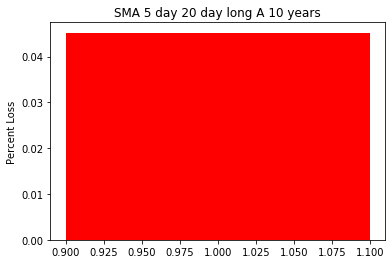

In [24]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar([1], [1-(9548/10000)], width=.2, color='r')
ax.set_title('SMA 5 day 20 day long A 10 years')
ax.set_ylabel('Percent Loss')
plt.savefig('SMA.png')

A parameter search that I wanted to try, but I did not have the computing resources.

In [0]:
best = []
for i in range(1,100,5):
  for h in [5,10,20,30,50,100,200]:
    for y in [5,10,20,30,50,100,200]:
      best.append([selling(find_buys_shorts(tenyears,ma1=h,ma2=y,buy='Long'),tenyears,starting_amount=10000,comission=4.5,max_wait=i),i,h])

In [0]:
best

In [0]:
best[0][0][1]

Filtering the parameter search and finding the best one.

In [0]:
bt = []
for t,i in enumerate(best):
  try:
    if ((i[0][0]-10000)/i[0][1]) > 0.25:
      bt.append([((i[0][0]-10000)/i[0][1]),t,i])
      ind = t
  except:
    continue
from operator import itemgetter
import operator
print(bt[0][0])
print(len(bt))
bt.sort(key = operator.itemgetter(0,0),reverse=True)
bt[:30]


In [131]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from datetime import datetime,timedelta

My second strategy using momentum and rebalancing the portfolio once per 1.5 months.

In [0]:
#calculate once per month the yearly return: if it is higher than 4% buy and hold for  a month
def momentum_rotate(stock_data,hold_period,money,tickers):
  annual_return = 0
  money = money
  each_month = []
  closest = []
  closest_index = []
  buys = []
  tempbuys = []
  #this is the good time series index counting by 1 month
  for index in list(stock_data['dateA'])[::30]:
    tempbuys = []
    if len(buys) > 0:
      #if there are any buys previosly i need to sell off at current sales price
      #find the stock ticker
      #find a date -2 from index date to +2 index date
      for buy in buys:
        index_datetime = datetime.strptime(index,'%Y-%m-%d')
        current_buy_price = pd.DataFrame(stock_data['date'+buy[2]],columns=['date'+buy[2]])
        twodaysbeforeindex_datetime = str(datetime.strftime(index_datetime - timedelta(2), '%Y-%m-%d')[:10])
        twodaysafterindex_datetime = str(datetime.strftime(index_datetime + timedelta(2), '%Y-%m-%d')[:10])
        time = current_buy_price[(current_buy_price['date'+buy[2]] > twodaysbeforeindex_datetime) & 
                                (current_buy_price['date'+buy[2]] < twodaysafterindex_datetime) ]
        #print(index,buy)
        try:
          current_price = (stock_data.loc[time.index[-1]]['close'+buy[2]] + stock_data.loc[time.index[0]]['close'+buy[2]])/2
        except:
          continue

      #find the current date - using index
        #print('money before selling {}'.format(money))
        money += (buy[0] * current_price)
        #print('profit is {}'.format(buy[0] * (current_price - buy[1])))
        #print('money after selling {}'.format(money))
      #print('profit is {}'.format((stock_data.loc[index]['close'] - buys[0][1]) * buys[0][0]))
      #print('percentage is {}'.format(((stock_data.loc[index]['close'] - buys[0][1])/buys[0][1])*100))
      buys = []
    #go through each stock ticker and see if there is enough data 1 years worth
    for ticker in tickers:
      #print(ticker)
      #make a new dataframe querying the ticker for 1 year previous to the index
      #previous_year = pd.DataFrame(stock_data[stock_data['date'+ticker] < index])
      try:
        specific_stock = pd.DataFrame(stock_data['date'+ticker],columns=['date'+ticker])
      except:
        continue
      specific_close_prices = pd.DataFrame(stock_data['close'+ticker],columns = ['close'+ticker])
      #print(specific_close_prices.head())
      #print(specific_stock['dateA'].head())
      #query = specific_stock[ > index]
      #print(query.head())
      #see if previous_year has 1 years worth of days or not
      current_day = index
      #print('index day is {}'.format(index))
      #print('first day in specific stock {}'.format(specific_stock.iloc[0]))
      first_day = specific_stock.iloc[0][0]
      current_day_datetime = datetime.strptime(current_day,'%Y-%m-%d')
      first_day_datetime = datetime.strptime(first_day,'%Y-%m-%d')
      difference = current_day_datetime - first_day_datetime
      if difference.days > 180:
        #print('made it',index,ticker)
        #print(specific_close_prices.head())
        #find the annual return percentage
        #find the closest date to 1 year time difference
        index_datetime = datetime.strptime(index,'%Y-%m-%d')
        oneyearprevious = str(datetime.strftime(index_datetime - timedelta(180), '%Y-%m-%d')[:10])
        #print(oneyearprevious)
        #print(type(oneyearprevious))
        #print(type(index))
        #the one year time period roughly
        time = specific_stock[(specific_stock['date'+ticker] > oneyearprevious) & 
                              (specific_stock['date'+ticker] < index) ]
        if len(time) < 5:
          continue
        #print(time.head())
        #print(time.tail())
        #print(time.index[-1])
        #print(type(float(stock_data.loc[index]['close'])))
        #print(type(float(stock_data.loc[closest[0][1]]['close'] ))) 
        #print(len(time),ticker,index)      
        annual_return = (float(specific_close_prices.loc[time.index[-1]]['close'+ticker]) - float(specific_close_prices.loc[time.index[0]]['close'+ticker]) )/ float(specific_close_prices.loc[time.index[0]]['close'+ticker])
        #print(annual_return)
        #add annual return ticker and price to best buys
        tempbuys.append([annual_return,ticker,specific_close_prices.loc[time.index[-1]]['close'+ticker]])
        #sort the buys to find top 10 buys 
        tempbuys.sort(key = lambda x: x[0], reverse = True)
        #buy equal amount of the top 10
      else:
        #less than 1 year time period
        continue
    counter = 0
    each_month.append(money)
    print(money)
    print(index)
    for buy in tempbuys[:5]:
          #how much money to alocate
      buy_amount = money / (len(tempbuys[:5])-counter)
      #print(len(tempbuys))
      #print(buy_amount)
          #how many shares per allocation
      shares_amount = round(buy_amount / buy[2])
          #add this buy to the buy
      buys.append([shares_amount,buy[2],buy[1]])
      #print(buys)
          #take the money from the money account
      money -= shares_amount * buy[2]
      #commission
      money -= 4
      counter +=1 
    counter = 0     
     #delete temp buys
  return  each_month,sum([x[0]*x[1] for x in buys]) + money

In [0]:
tickers = stocklist.Ticker

The results of using a 6 month momentum with 1.5 month rebalancing. Results are very good, but there might be something better if I knew why some months did not do good with the momentum, or why the 3 month momentum strategy didn't do as well then I could account for that.

In [22]:


returns = momentum_rotate(stockdata,1,10000,tickers)

10000
2009-11-02
10000
2009-12-15
10000
2010-01-29
10000
2010-03-15
10000
2010-04-27
10000
2010-06-09
10416.01
2010-07-22
11370.39
2010-09-02
12440.529999999999
2010-10-15
16385.754999999997
2010-11-29
17911.304999999997
2011-01-11
22389.795
2011-02-24
22922.315
2011-04-07
23160.885
2011-05-20
25405.434999999994
2011-07-05
23040.654999999995
2011-08-16
23150.644999999997
2011-09-28
22756.95
2011-11-09
21414.555
2011-12-22
24032.43
2012-02-07
25442.915
2012-03-21
27845.86
2012-05-03
23754.300000000003
2012-06-15
24239.665
2012-07-30
23934.899999999998
2012-09-11
24390.544999999995
2012-10-23
23313.614999999998
2012-12-07
24874.674999999996
2013-01-23
30564.934999999994
2013-03-07
29458.96499999999
2013-04-19
36164.11499999999
2013-06-03
40050.19499999999
2013-07-16
42084.634999999995
2013-08-27
45256.85
2013-10-09
47974.784999999996
2013-11-20
43402.83500000001
2014-01-06
51282.61
2014-02-19
47153.775
2014-04-02
47012.780000000006
2014-05-15
52323.34
2014-06-27
49842.34
2014-08-11
52629

In [0]:
returns[0]

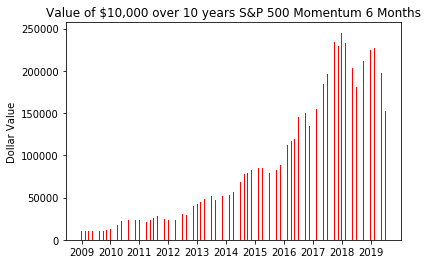

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = plt.subplot(111)
ax.bar([x for x in range(len(returns[0]))],returns[0], width=.2, color='r')
ax.set_title('Value of $10,000 over 10 years S&P 500 Momentum 6 Months')
ax.set_ylabel('Dollar Value')
ax.set_xticks([x for x in range(0,85,8)])
ax.set_xticklabels([x for x in range(2009,2020)])
plt.savefig('Momentum6Mo.png')

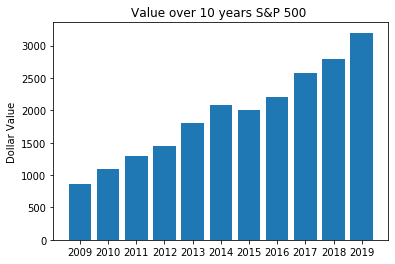

In [25]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar([x for x in range(11)],[856,1100,1300,1450,1805,2081,2005,2200,2575,2790,3200])
ax.set_title('Value over 10 years S&P 500 ')
ax.set_ylabel('Dollar Value')
ax.set_xticks([x for x in range(0,11)])
ax.set_xticklabels([x for x in range(2009,2020)])
plt.savefig('SP500.png')

The third strategy uses the financials and the ratios. It has to find the nearest financials since each company reports financials on different days. The same with the ratios. There is more below

In [204]:
#find the nearest financial
from datetime import datetime,timedelta
def nearest_financial(ticker,day):
  closest_delta = []
  stock_day = day
  for day in finances['date'+ticker]:
    try:
      day_datetime = datetime.strptime(day,'%Y-%m-%d')
    except:
      continue
    #print(day_datetime)
    diff = stock_day - day_datetime
    if diff.days > -1 :
      closest_delta.append([diff.days,day_datetime])
    #print(stock_day - day_datetime)
  try:
    closest_delta.sort(key = lambda x: x[0])
  except:
    return 'No financials or none before the stock day'
  if len(closest_delta)==0:
    return 'No financials or none beefore the stock day'
  return closest_delta[0][1]
day = datetime(2009,10,18)
nearest_financial('A',day)

datetime.datetime(2009, 7, 31, 0, 0)

In [0]:
#finding the index of where the nearest financial is
from datetime import datetime,timedelta
day = datetime(2009,10,18)
nearest_fin_day = nearest_financial('A',day)
def index_nearest_financial(day,ticker):
  #print(type(day))
  #print(day)
  #print(isinstance(day,str))
  if type(day) =='str':
    return 'error day is not a day is a string type'
  if isinstance(day,str):
    return 'error day is not a day is a string'
  
  for counter,i in enumerate(finances['date'+ticker]):
  #nearest_fin_day = nearest_financial('A',day)
    if datetime.strptime(i,'%Y-%m-%d') == day:
      #print(i,day)
      #print(counter)
      return counter
#index_nearest_financial('str','A')

In [206]:
def index_certain_stock_column(ticker):
  for counter, i in enumerate(finances.columns):
    if i == 'date'+ticker:
      return counter
print(index_certain_stock_column('AAPL'))

100


In [207]:
def nearest_ratio(ticker,day):
  closest_delta = []
  stock_day = day
  for day in ratios['date'+ticker]:
    try:
      day_datetime = datetime.strptime(day,'%Y-%m-%d')
    except:
      continue
    #print(day_datetime)
    diff = stock_day - day_datetime
    if diff.days > -1 :
      closest_delta.append([diff.days,day_datetime])
    #print(stock_day - day_datetime)
  try:
    closest_delta.sort(key = lambda x: x[0])
  except:
    return 'No ratios or none before the stock day'
  if len(closest_delta)==0:
    return 'No ratios or none beefore the stock day'
  return closest_delta[0][1]
day = datetime(2018,11,18)
print(nearest_ratio('A',day))

2018-10-31 00:00:00


In [208]:
#make a nearest ratios function
from datetime import datetime,timedelta
day = datetime(2018,11,18)
def index_nearest_ratio(day,ticker):
  for counter,i in enumerate(ratios['date'+ticker]):
  #nearest_fin_day = nearest_financial('A',day)
    if datetime.strptime(i,'%Y-%m-%d') == day:
      #print(i,day)
      #print(counter)
      return counter
print(index_nearest_ratio(nearest_ratio('A',day),'A'))

0


In [209]:
def index_certain_ratio_column(ticker):
  for counter, i in enumerate(ratios.columns):
    if i == 'date'+ticker:
      return counter
print(index_certain_ratio_column('AAL'))
ratios.iloc[0,61]


61


'2018-12-31'

This finds the return given a certain stock and amount of time.

In [0]:
from datetime import datetime,timedelta
def return_percent(sell,ticker,amount_of_days):
  closest = []
  try:
    stockdata['date'+ticker]
  except:
    return 0
  for counter,i in enumerate(stockdata['date'+ticker]):
    try:
      current = datetime.strptime(i,'%Y-%m-%d')
    except:
      continue
      #find the closest price to the sell date
    diff = sell - current
    abs_diff = diff.days - amount_of_days
    if diff.days < 0 :
      break
    if abs_diff < 0 :
      closest.append([stockdata['close'+ticker][counter],diff.days,100,current])
    else:
      closest.append([stockdata['close'+ticker][counter],diff.days,abs_diff,current])
  closest.sort(key = lambda x : x[1])
  #print(closest)
  try:
    sell_price = closest[0][0]
  except:
    return 0
  #print(sell_price)
  closest.sort(key = lambda x :x[2])
  #print(closest)
  buy_price = closest[0][0]
  #print(buy_price)
  return (sell_price -buy_price) / buy_price

In [0]:
from sklearn.metrics import accuracy_score

This combines the previous functions together and returns the finances and the ratios in a dataframe for all of the stocks given a certain day.


In [0]:
#get the 4 month later of financials and ratios so that financials will be somewhat different
def get_finance_and_ratio(day):
  rows_list = []
  for i in stocklist.Ticker:
    try:
      f = finances.iloc[index_nearest_financial(nearest_financial(i,day),i),index_certain_stock_column(i)+1:index_certain_stock_column(i)+32].to_list()
    except:
      f = [0]
    rows_list.append(f)
  df = pd.DataFrame(rows_list)
  #print(len(df))
  df.columns = finances.columns[2:33]
  rows_list = []
  for i in stocklist.Ticker:
    try:
      f = ratios.iloc[index_nearest_ratio(nearest_ratio(i,day),i),index_certain_ratio_column(i)+1:index_certain_ratio_column(i)+60].to_list()
    except:
      f = [0]
    rows_list.append(f)
  rf = pd.DataFrame(rows_list)
  cols = ratios.columns[1:61]
  cols = [x[:-1] for x in cols]
  rf.columns = cols[1:]
  #print(len(rf))
  x = pd.concat([df,rf],axis=1)
  #print(len(x))
  #idk why this is wrong
  #for i in range(500):
    #if type(x['Net Income ComA'][i]) == numpy.float64:
      #continue
    #else:
      #x['Net Income ComA'][i] = 0
    #if type(x['Preferred DividendsA'][i]) == numpy.float64:
      #continue
    #else:
      #x['Preferred DividendsA'][i] = 0
  #x.fillna(0,inplace=True)
  return x
#tet = get_finance_and_ratio(datetime(2010,2,1))
#print(tet)

This finds the returns and then returns a list of 0's and 1's determined by if the return is larger than the minimum return target.

In [0]:
def y_returns(day,percent):
  returns = []
  for i in stocklist.Ticker:
    returns.append(return_percent(day,i,365))
  returns = [x if str(x) != 'nan' else 0 for x in returns]
  returns = [1 if x >percent else 0 for x in returns]
  return returns

This finds the returns in raw return format.

In [0]:
def percent_returns(day,percent):
  returns = []
  for i in stocklist.Ticker:
    returns.append(return_percent(day,i,30))
  returns = [x if str(x) != 'nan' else 0 for x in returns]
  return returns

This is the return given the certain percent return target strategy and also it calculates the accuracy of the random forest predictions only the ones that were classified as 1 or a buy.

In [0]:
def results(preds,returns,percent):
  results = []
  for j,i in enumerate(preds):
    if i == 1:
      results.append(returns[j])
  metpercenttarget = [0 if x < percent else 1 for x in results]
  if len(results) == 0 :
    return 0,0
  return sum(results)/len(results),metpercenttarget
#results.sort(reverse=True)
#results

In [0]:
#accuracy_score(returns,newpreds)
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


This combines all the other functions all into one function.
1. Sets the money at $10,000
2.Pandas creates a date range using my 3 month frequency
3. I call the get_finance_and_ratio function with to find the previous financials and ratios, fill in na's with 0's
4. I call that function on the current day
5. I used pandas greater than function to find financials momentum
6. then I train a random forest with 150 estimators 9 depth max and no less than 25 samples per split
7.Grab the return data for the stocks in this current month to next month
8.get the future month financials and ratios to predict
9.calculate momentum using the future month and the current month
10.make the predictions for if the stocks will return a certain percentage
11.calculate returns on the future months stocks
12. calculate prediction accuracy overall
13. calculate prediction accuracy on stocks that were bought
14. calculate return on stocks bought
15. keep track of the money by adding the money into the money variable

In [265]:
def random_forest(start,percent):
  accuracy_list = []
  money = 10000
  days = pd.date_range(start='1/1/2018', periods=24, freq='3M')
  counter = 0
  
  for element in range(1,len(days)):
    #get the first training data or random forest
      #print('past')
    past = get_finance_and_ratio(days[element-1])
    past.fillna(0,inplace=True)
    training = get_finance_and_ratio(days[element])
    training.fillna(0,inplace=True)
    momentum = training.gt(past)
    train = pd.concat([training,momentum],axis=1)

      #print('filla na')
    #make the random forest
    rad = DecisionTreeClassifier(max_depth=9,min_samples_split=25)
      #print('random')
    #get the Y train data from future month
    y = y_returns(days[element+1],percent)
      #print(y)
    #print('gpt ')
    #fit the random forest
    rad.fit(train,y)
    importanecs = rad.feature_importances_
    #print(importanecs[:10])
    #get future test data
    future = get_finance_and_ratio(days[element+1])
    future.fillna(0,inplace=True)
    momentum = future.gt(training)
    #print('moment')
    #print(momentum.shape)
    #print(future.shape)
    test = pd.concat([future,momentum],axis=1)
    #predict future with test data
    #preds =rad.predict(test)
      #print('test')
    #find accuracy overall
    returns = y_returns(days[element+2],percent)
    #accuracy = accuracy_score(returns,preds)

    #find the return percent only for classified winning stocks
    returns_percent = percent_returns(days[element+2],percent)
    #result = results(preds,returns_percent,percent)
    #print(result)
    #print(preds)
    print(returns_percent)
    try:
      accuracy_picked = sum(result[1]) / len(result[1])
    except:
      accuracy_picked = 0
    #returns_picked = result[0]
    #accuracy_list.append([accuracy,accuracy_picked,returns_picked,importanecs])
    counter +=1
    #money = money * (1+returns_picked)
    #print(accuracy,'% of accurate preds')
    #print(accuracy_picked,'% of accuracy picked')
    #print(returns_picked,'return monthly picked')
    #print(money,'money counter')
    #print(days[element])
    if counter > 0:
      break
  return accuracy_list,importanecs,rad
rand_test = random_forest('tao;',0.2)

[-0.09079427448779116, -0.11436505932845244, -0.058018867924528324, -0.03696206987591295, -0.18052631578947376, -0.051621942019614245, -0.23196398424310638, -0.06988667026443614, -0.09157973603826862, -0.10791680278776006, -0.0939495616408703, -0.05707443624027139, -0.044182035292556696, -0.1331146989572822, -0.16881028938906753, 0.020382366882603874, 0.03469675599435816, 0.03772241992882557, -0.08672603901611528, -0.17844330057713315, -0.22211755840241146, -0.01847206385404794, -0.09098559940153361, -0.015431688173473415, 0.010065706696490966, -0.016065053550178544, -0.435022476501839, -0.09356552538370724, -0.028519232720998704, -0.0593592275619925, -0.1826866977829639, -0.14241001564945227, -0.09090909090909094, -0.4204328453214513, -0.15844937899887085, -0.17139316177006628, -0.06824223092165678, -0.14506483907814297, 0.08178851628133028, -0.2027330419685086, -0.1128100446772454, -0.1959677419354838, -0.0022809558291093245, 0.008588957055214804, -0.15466023022651315, -0.21774193548

In [0]:
cols = get_finance_and_ratio(datetime(2012,5,5)).columns

In [238]:
importances = rand_test[1]

90

In [0]:
importance_and_cols = [[x,cols[i]] if i <90 else [x,cols[i-90]] for i,x in enumerate(importances)]

In [0]:
importance_and_cols.sort(key = lambda x: x[0])

In [245]:
importance_and_cols[-15:]
#the top 15 most important features

[[0.01672365890101216, 'operatingPerformanceRatios.payablesTurnover'],
 [0.01725989655548615, 'profitabilityIndicatorRatios.ebitperRevenue'],
 [0.017308005978629585, 'cashFlowIndicatorRatios.payoutRatio'],
 [0.017490708017296856, 'profitabilityIndicatorRatios.eBITperRevenue'],
 [0.017830101287623724, 'profitabilityIndicatorRatios.returnOnEquity'],
 [0.021851932404434286, 'investmentValuationRatios.priceBookValueRatio'],
 [0.0223862364714265, 'investmentValuationRatios.receivablesTurnover'],
 [0.022387149901999567, 'cashFlowIndicatorRatios.dividendPayoutRatio'],
 [0.022613529998720586, 'operatingPerformanceRatios.receivablesTurnover'],
 [0.022759250822726198, 'investmentValuationRatios.priceToBookRatio'],
 [0.022942599877762104, 'cashFlowIndicatorRatios.receivablesTurnover'],
 [0.0236368931596663, 'investmentValuationRatios.priceFairValue'],
 [0.030384292484811032, 'profitabilityIndicatorRatios.returnOnAssets'],
 [0.03851431730581656, 'profitabilityIndicatorRatios.netProfitMargin'],
 [0

In [0]:
tree = rand_test[2]

In [0]:
from sklearn.tree.export import export_text

Step 5. Interpret

I believe that Simple moving average strategies would easily be able to beat the market rate of return. There is such a huge amount of calculations that it is hard to know for sure until calculating all of it. There just needs to be a large amount of volatility for a simple moving average strategy to work and also to have some non-random price moves. Such as knowing that in the tech industry when the 20 day SMA crosses under the 100 day SMA that it is a good time to buy as tech stocks 60% of the time go up 2% in less than 5 days. While the other 40% of the time you can limit losses by using a stop loss of 1%. Knowing that these happen commonly would make it easy to take advantage and probably make a good return. 

The second momentum strategy I know did very well just as I expected as most strategies involve momentum in some way such as simple moving averages involves a sepcific tpye of momentum. I got 35% returns with 6 month momentum and I'm sure that I could find other good parameter settings for using momentum factors to my advantage. There is such a huge amount of calculations that it takes a lot of cloud computing to calculate all of the strategies. The good thing is that these likely will not stop working anytime soon because they have worked for so long and the worst that might happen is that they become less profitable, but that happens over a long time period. 

The third strategy that I did probably also would beat the market, but I didn't have the computing resources to do it. I should say that I would have a lot better time trying to find good returning stocks if I wasn't limited to only the S&P 500. There are thousands of stocks and those stocks have less traders and more profit potential. So if I was working with the whole stock market it would be an easier task for sure. Either way I was able with a few passes to find a strategy that went from 1% return to near 11% returns. So with adding more features that would give the model more momentum information.


Mostly this project taught me that to figure out the stockmarket is difficult because there is a lot of data and that there are huge amounts of strategies to try. I believe that if I used cloud computing that it would be worth the cost to run all of the strategies if I had $10,000 I think I would have found a few 30% return per year strategies at a cost of $.8 per hour for a few computers worth of computing running for a week is in the ball park of time to find enough good strategies in my estimation. That would cost $.8 per hour * 4 computers * 24 hours * 7 days = $537. This is 5% of the portfolio, but with even a 20% return per year it would be worth it. or $9500 * 1.2 = $11,400 or 14% which is more than the S&P 500. If I'm right the cost of a cascade processor is only $6 per 30 hours so if it takes 500 hours then only $100 to calculate all the momentum, random forest, and moving averages in the whole S&P 500 and probably even more strategies would be worth while.

In [0]:

from sklearn.tree import export_graphviz

In [0]:
export_graphviz(tree, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

The top split for determining between stocks that return 20% in 3 months or not is whether revenue growth is larger than 10%. Then fixed asset turnover and asset turnover. So essentially these make up the most important factors for determining stocks going up 20% in 3 months. 

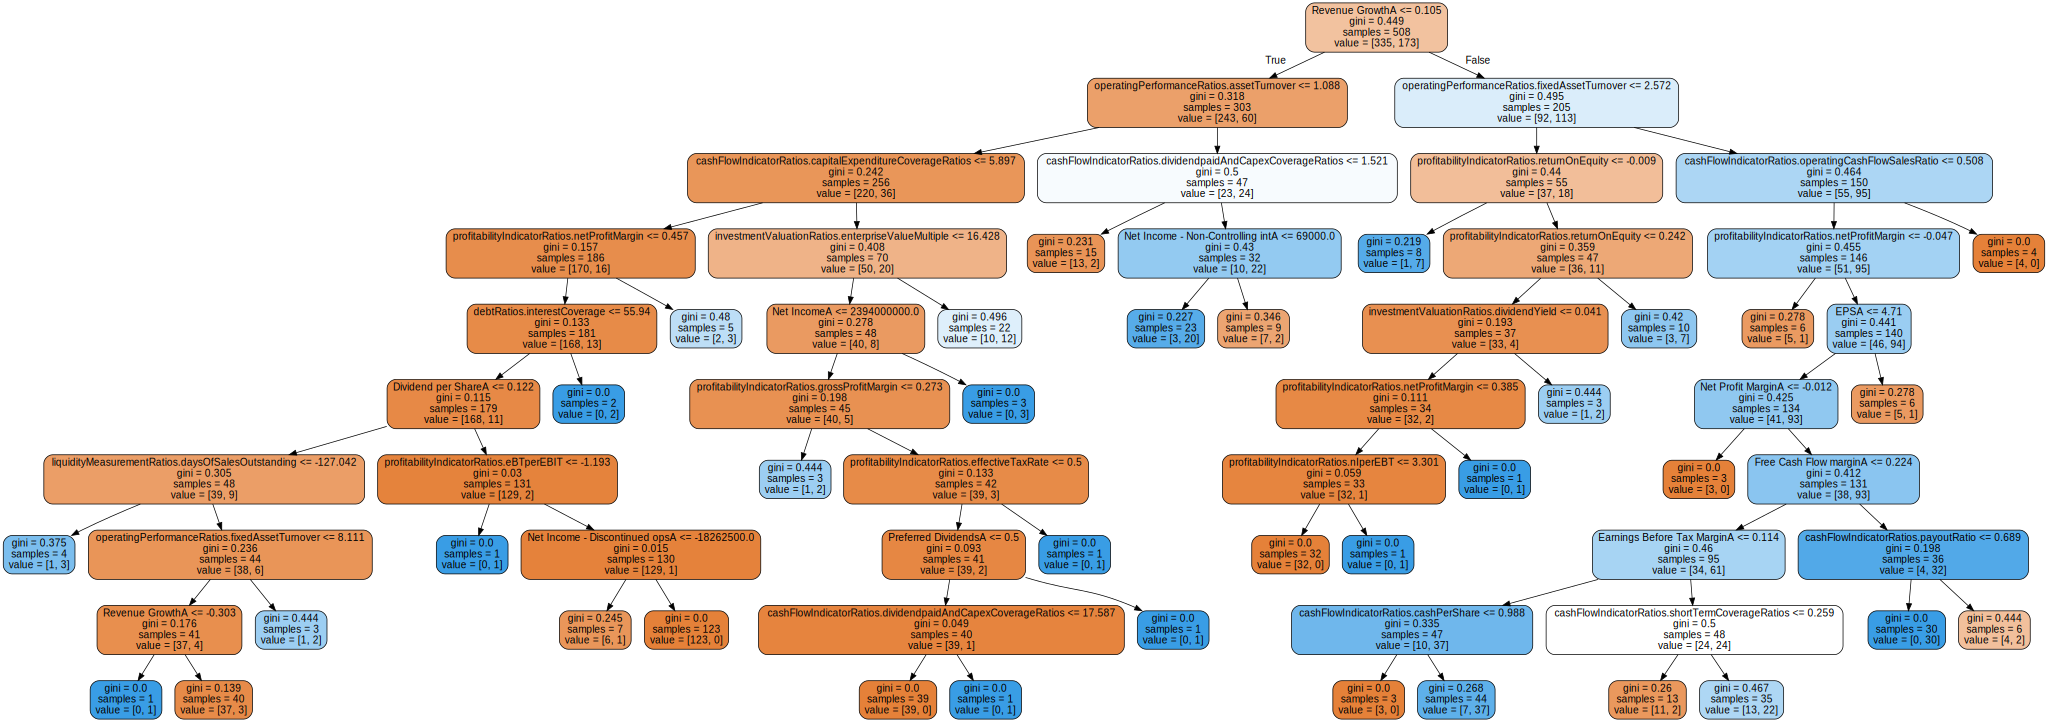

In [275]:
graphviz.Source(export_graphviz(tree,feature_names=(list(cols)+list(cols)),filled=True,rounded=True))
#blue is good
#orange less than 20% return